In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
connectivity_min, connectivity_max, connectivity_step = 10,50,2
connectivity_span = np.arange(connectivity_min,connectivity_max,connectivity_step)
total_time = 1000
observing_ensembles = ['10000']

In [3]:
sync_param_dict = {}
sigma_dict = {}
spikes_period_dict = {}

for num_neurons in observing_ensembles:
    sample_path = os.path.join('ensembles','N{}_T{}_g_{}_{}_{}'.format(num_neurons,total_time,connectivity_min,connectivity_max, connectivity_step))
    
    sync_param_dict[num_neurons] = np.load( os.path.join(sample_path,'sync_param_records.npy') ) 
    sigma_dict[num_neurons] = np.load( os.path.join(sample_path,'sigma_records.npy') ) 
    spikes_period_dict[num_neurons] = np.load( os.path.join(sample_path,'neurons_mean_spiking_period.npy') ) 

In [4]:
neurons_num_string = '_'.join(observing_ensembles)
path = os.path.join('ensembles',neurons_num_string)
try:
    os.makedirs(path)
except:
    pass

## Amin Saman parameter

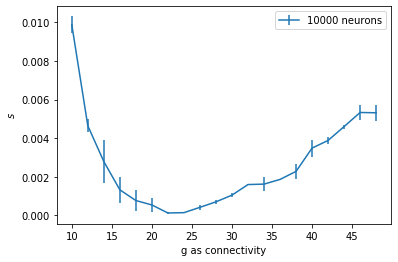

In [5]:
fig = plt.figure()
ax = fig.subplots()
for x in observing_ensembles:
    ax.errorbar(x = connectivity_span, y = np.mean(sync_param_dict[x],axis = 1),
                yerr = np.var(sync_param_dict[x],axis = 1)**(0.5),label = x + ' neurons')

plt.legend()
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$s$')
fig.savefig(os.path.join(path,'pops_sync_param.png'))

## Standard deviation of the current

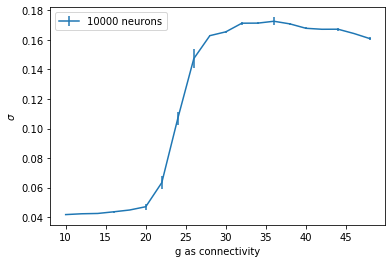

In [6]:
fig = plt.figure()
ax = fig.subplots()
for x in observing_ensembles:
    ax.errorbar(x = connectivity_span, y = np.mean(sigma_dict[x],axis = 1),
                yerr = np.var(sigma_dict[x],axis = 1)**(0.5),label = x + ' neurons')

plt.legend()
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$\sigma$')
fig.savefig(os.path.join(path,'pops_sigma.png') )

## Mean spikies period

In [7]:
ensemble = '10000'
spikies_mean_record = spikes_period_dict[ensemble]
spikies_mean_record[:,:,:].shape
spikies_mean_record[0,0,:].shape

(10000,)

In [12]:
# bins=np.logspace(np.log10(0.1),np.log10(10.0), 20)
bins = np.arange(0,100,0.5)
ensemble = '10000'
spikies_mean_record = spikes_period_dict[ensemble]

num_ensemble_each_network = np.shape( spikies_mean_record )[1]
heights_mean_arr = np.zeros( shape =  (np.shape( spikies_mean_record )[0],len(bins)-1) )
for g_ind, g in enumerate(connectivity_span):
    for ensemble_ind in range(num_ensemble_each_network):
        heights_mean_arr[g_ind][:] = np.histogram(spikies_mean_record[g_ind,ensemble_ind,:],bins=bins,density = True)[0] 


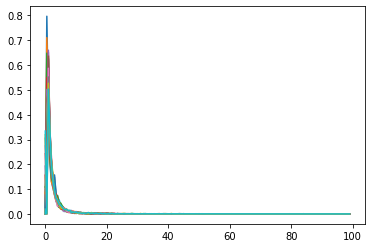

In [13]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(bins[:-1], heights_mean_arr.T)
plt.show()

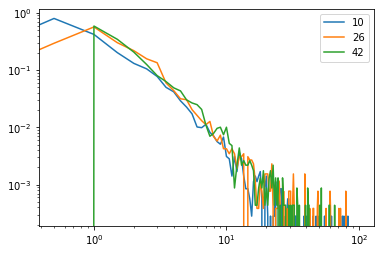

In [14]:
fig = plt.figure()
ax = fig.subplots()

for g_ind, g in list(enumerate(connectivity_span))[:-1:8]:
    ax.plot(bins[:-1],heights_mean_arr[g_ind],label = round(g,2))
plt.legend()

plt.xscale('log')
plt.yscale('log')

In [11]:
bins

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])